In [ ]:
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
data_file='https://raw.githubusercontent.com/shubham404-error/Diabetes_ML_Class-Assignment/main/car.data'
data=pd.read_csv(data_file, names=['buying','maint','doors','persona','lug_boot','safety','class'])
data.head()

,buying,maint,doors,persona,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [ ]:
data.describe()

,buying,maint,doors,persona,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persona   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


<BarContainer object of 4 artists>

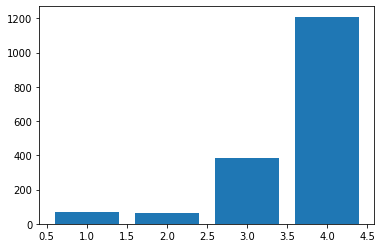

In [ ]:
from collections import Counter
Counter(data['class'])
counter=Counter(data['class'])
plt.bar(counter.keys(),counter.values())


In [ ]:
from imblearn.over_sampling import SMOTE
sampler=SMOTE()
for col in data.columns:
    print(col,set(data[col]))

buying {0, 1, 2, 3}
maint {0, 1, 2, 3}
doors {0, 1, 2, 3}
persona {1, 2, 3}
lug_boot {1, 2, 3}
safety {0, 1, 2}
class {1, 2, 3, 4}


In [ ]:
data.buying=data.buying.map({'low':0,'high':1,'med':2,'vhigh':3})
data.maint=data.maint.map({'low':0,'high':1,'med':2,'vhigh':3})
data.doors=data.doors.map({'5more':3,'3':2,'4':1,'2':0})
data.persona=data.persona.map({'more':3,'2':2,'4':1})
data.lug_boot=data.lug_boot.map({'big':3,'med':2,'small':1})
data.safety=data.safety.map({'high':2,'med':1,'low':0})
data['class']= data['class'].map({'good':1,'vgood':2,'acc':3,'unacc':4})


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
Y=data['class']
X=data.drop('class',axis=1)

In [ ]:
train_X,test_X,train_Y,test_Y=train_test_split(X,Y,random_state=42)

<BarContainer object of 4 artists>

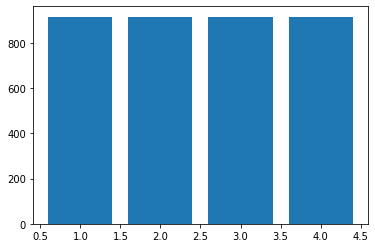

In [ ]:
rtrain_X,rtrain_Y= sampler.fit_resample(train_X, train_Y)
rcount = Counter(rtrain_Y)
plt.bar(rcount.keys(), rcount.values())

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(hidden_layer_sizes=(101,10,10),max_iter=1000)
mlp.fit(rtrain_X,rtrain_Y)
MLPClassifier()

MLPClassifier()

In [ ]:
from sklearn.metrics import accuracy_score
predicted= mlp.predict(test_X)
accuracy_score(predicted,test_Y)

0.875

In [ ]:
from sklearn.metrics import *
y_pred= mlp.predict(test_X)
print("\n",classification_report(y_pred,test_Y))


               precision    recall  f1-score   support

           1       0.80      0.35      0.49        34
           2       0.70      0.56      0.62        25
           3       0.73      0.82      0.77        91
           4       0.94      0.98      0.96       282

    accuracy                           0.88       432
   macro avg       0.79      0.68      0.71       432
weighted avg       0.87      0.88      0.87       432

